<a href="https://colab.research.google.com/github/ianuvrat/Competition-Time-Series/blob/main/competition_ARIMA_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uploading files

In [1]:
from google.colab import files
files.upload()

Saving sample.csv to sample.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


{'sample.csv': b'ID,Close\r\nid_713,85\r\nid_714,85\r\nid_715,85\r\nid_716,85\r\nid_717,85\r\nid_718,85\r\nid_719,85\r\nid_720,85\r\nid_721,85\r\nid_722,85\r\nid_723,85\r\nid_724,85\r\nid_725,85\r\nid_726,85\r\nid_727,85\r\nid_728,85\r\nid_729,85\r\nid_730,85\r\nid_731,85\r\nid_732,85\r\nid_733,85\r\nid_734,85\r\nid_735,85\r\nid_736,85\r\nid_737,85\r\nid_738,85\r\nid_739,85\r\nid_740,85\r\nid_741,85\r\nid_742,85\r\nid_743,85\r\nid_744,85\r\nid_745,85\r\nid_746,85\r\nid_747,85\r\nid_748,85\r\nid_749,85\r\nid_750,85\r\nid_751,85\r\nid_752,85\r\nid_753,85\r\nid_1467,85\r\nid_1468,85\r\nid_1469,85\r\nid_1470,85\r\nid_1471,85\r\nid_1472,85\r\nid_1473,85\r\nid_1474,85\r\nid_1475,85\r\nid_1476,85\r\nid_1477,85\r\nid_1478,85\r\nid_1479,85\r\nid_1480,85\r\nid_1481,85\r\nid_1482,85\r\nid_1483,85\r\nid_1484,85\r\nid_1485,85\r\nid_1486,85\r\nid_1487,85\r\nid_1488,85\r\nid_1489,85\r\nid_1490,85\r\nid_1491,85\r\nid_1492,85\r\nid_1493,85\r\nid_1494,85\r\nid_1495,85\r\nid_1496,85\r\nid_1497,85\r\nid_1

# Importing libraries and dataset

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [10]:
df=pd.read_csv('train.csv',parse_dates=[2])
df_test=pd.read_csv('test.csv',parse_dates=[2])
ss=pd.read_csv('sample.csv')

df.shape, df_test.shape, ss.shape

((73439, 9), (4223, 5), (4223, 2))

In [11]:
df.head()

ID  stock       Date  ...    Close  holiday  unpredictability_score
0  id_0      0 2017-01-03  ...  82.8101        1                       7
1  id_1      0 2017-01-04  ...  82.9690        0                       7
2  id_2      0 2017-01-05  ...  82.8578        0                       7
3  id_3      0 2017-01-06  ...  82.7385        0                       7
4  id_4      0 2017-01-09  ...  81.8641        0                       7

[5 rows x 9 columns]

# Installing ARIMA

In [12]:
pip install pmdarima 

Important packages

In [13]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error , mean_absolute_error 

Unique Stocks

In [14]:
df.stock.nunique()

103

No. of records for each year

In [15]:
df['Date'].dt.year.value_counts()

2018    25853
2017    25853
2019    21733
Name: Date, dtype: int64

# EDA of few individual stocks

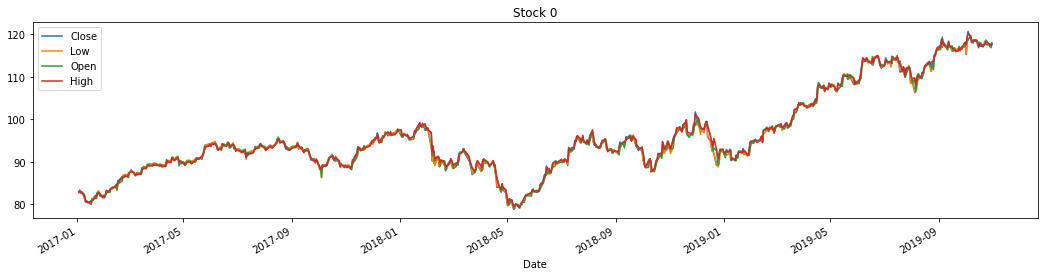

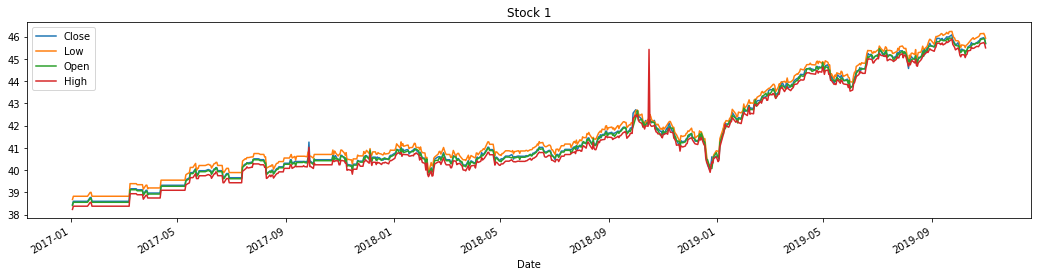

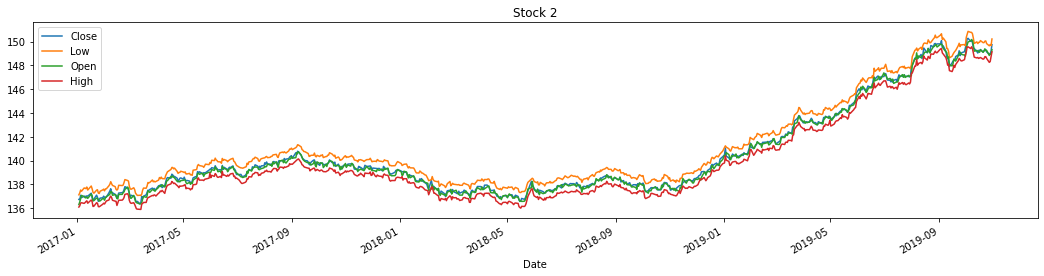

In [16]:
for stock in range (0,3):

  fltr=df['stock']==stock
  _=df[fltr].set_index('Date')[['Close','Low','Open','High']].plot(figsize=(18,4),title= f'Stock {stock}')

# **Test for Stationarity**

In [17]:
def test_stationarity(timeseries):                                               
  
  #Determining rolling statistics
  rolmean= timeseries.rolling(12).mean()                                        # rolling mean
  rolstd = timeseries.rolling(12).std()                                         # rolling standard Deviation

  #Plot Rolling statistics:
  plt.plot(timeseries, color='blue', label='Original')
  plt.plot(rolmean, color='red', label='Rolling Mean')
  plt.plot(rolstd, color='black', label='Rolling std') 
  plt.legend(loc='best')
  plt.title('Rolling Mean and Standard Deviation')
  plt.show(block=False)

  print("Results of Dicky Fuller test")
  adft = adfuller(timeseries,autolag = 'AIC')                                   #Dicky Fuller test to check p-value and confirm stationarity

  output=pd.Series(adft[0:4], index = ['ADF Test Statistics', 'p-value', '#Lags used', 'No. of observations used'])
  for key,values in adft[4].items():
    output['critical value (%s)' %key] = values
  print(output)

In [18]:
df2=df[df.stock==0]

Moving Average and Std.

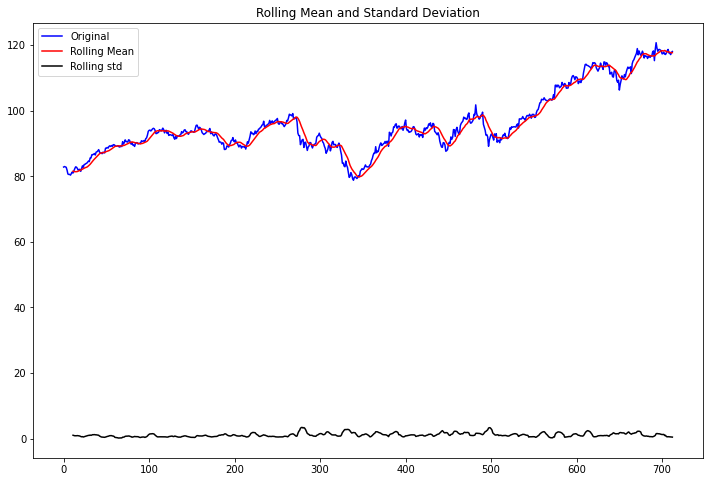

Results of Dicky Fuller test
ADF Test Statistics          -0.450510
p-value                       0.901318
#Lags used                    3.000000
No. of observations used    709.000000
critical value (1%)          -3.439607
critical value (5%)          -2.865625
critical value (10%)         -2.568945
dtype: float64


In [19]:
fig = plt.figure(figsize=(12,8))
test_stationarity(df2.Close)

**p-value   0.901318** ------------> Data is not Stationary

# **Decomposing Seasonality** into 3 componenets to determine at what time did the data becomes stationary

<Figure size 432x288 with 0 Axes>

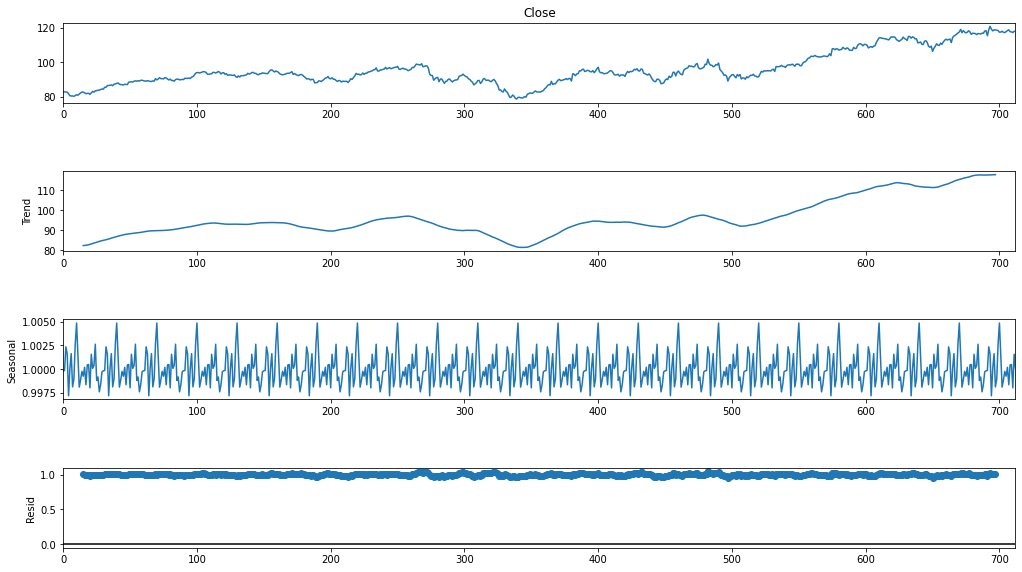

In [20]:
result = seasonal_decompose (df2.Close, model='multiplicative',  freq= 30)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

Observations:
1. Strong Trend
2. Regular Seasonality
3. Very flat residual

Lets dig down more on **trend**

Taking log 

No handles with labels found to put in legend.


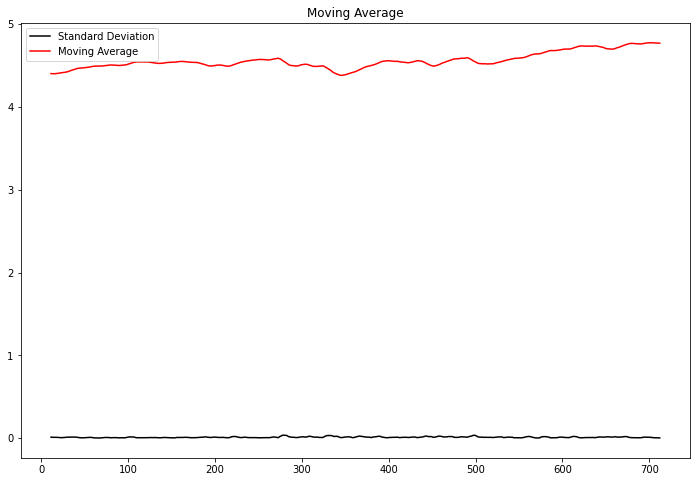

In [21]:
df_log= np.log(df2.Close)                        # taking log of close values
moving_avg = df_log.rolling(12).mean()           # taking moving average of log (close values)
std_dev = df_log.rolling(12).std()               #taking standard deviation of log(Close value)

fig = plt.figure(figsize=(12,8))
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color='black', label = 'Standard Deviation')
plt.plot(moving_avg, color='red', label = 'Moving Average')
plt.legend()
plt.show()


Splitting data into train and test (9:1)

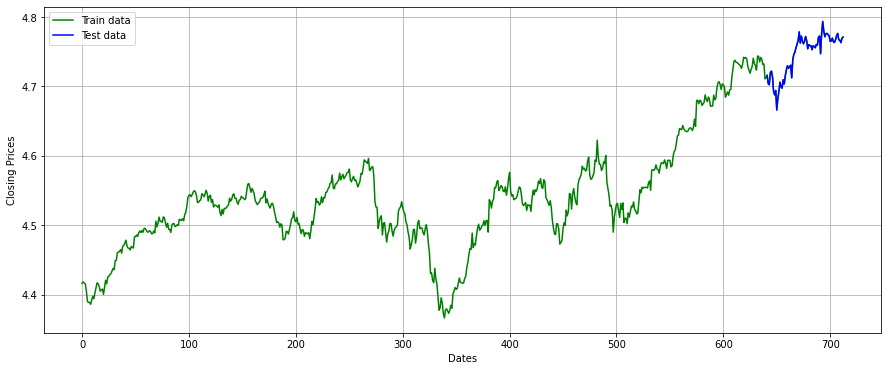

In [22]:
train_data, test_data  = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]         #90%,10%

plt.figure(figsize=(15,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

# Doing **AUTO ARIMA** to get best values of p,d,q 

In [23]:
df3 = df2[["holiday",'unpredictability_score']]                 #EXOGENOUS Variable

model_autoARIMA = auto_arima(df2.Close, 
                             start_p = 0,start_q = 0,
                             test='adf',                        # use adftest to find optimal 'd'
                             max_p=3,max_q=3,
                             m=1,                               #frequency of series
                             d=None,                            #let model determine 'd'
                             seasonal=False,                    # No seasonality
                             start_P=0,
                             D=0,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True,
                             exogenous=df3)

print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5268.684, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4378.449, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1883.986, Time=0.75 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1888.138, Time=1.23 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1884.306, Time=0.58 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3735.114, Time=0.48 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1883.836, Time=1.61 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1884.974, Time=1.75 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1883.800, Time=0.96 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1881.881, Time=0.68 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=3293.985, Time=0.81 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1883.881, Time=0.47 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0]       

**Diagonistics**

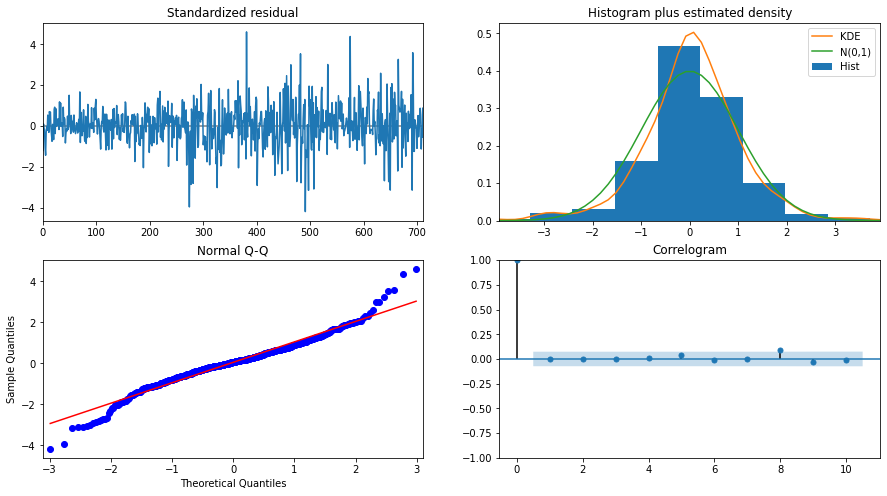

In [ ]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Fitting ARIMA with best p,d,q

In [24]:
model=ARIMA(df2.Close, order=(1,0,3))
fitted=model.fit(disp=-1)
print(fitted.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  713
Model:                     ARMA(1, 3)   Log Likelihood                -933.969
Method:                       css-mle   S.D. of innovations              0.893
Date:                Tue, 24 Nov 2020   AIC                           1879.938
Time:                        15:04:16   BIC                           1907.355
Sample:                             0   HQIC                          1890.528
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          98.5747     10.608      9.292      0.000      77.783     119.367
ar.L1.Close     0.9980      0.002    465.443      0.000       0.994       1.002
ma.L1.Close    -0.0560      0.038     -1.492    

# **Seaonal ARIMA with Exodus variable - SARIMAX**

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [26]:
model = SARIMAX(df2.Close,
                exog=df3,                                             #Exogenous Variable
                order=(1,0,3),                                        #p,d,q order
                enforce_invertibility=False, enforce_stationarity=False)

In [27]:
forecast = pd.DataFrame()                                           # Dataframe for one of the stocks
predictions = list() 

In [28]:
for i in range(0,len(pd.unique(df.stock))):
  df2 = df[df.stock==i]                                                         # one stock at a time
  df3 = df2[["holiday",'unpredictability_score']]                               # Exogenous variables

  model_autoARIMA = auto_arima(np.log(df2.Close),                               # Taking log (Close)
                             start_p = 0,start_q = 0,
                             test='adf',                                        # use adftest to find optimal 'd'
                             max_p=10,max_q=10,
                             m=1,                                               #frequency of seasonality
                             d=None,                                            #let model determine 'd'
                             seasonal=False,                                    # No seasonality
                             start_P=0,
                             D=0,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True,
                             out_of_sample_size=250,
                             exogenous=df3)
  model = SARIMAX(np.log(df2.Close),                                            # Taking log (Close)
                  trend = 'ct',
                  time_varying_regression=True,
                  mle_regression=False,
                  harvey_representation=True,
                  exog=df3,
                  order=model_autoARIMA.get_params()['order'],
                  enforce_invertibility=False, enforce_stationarity=True)
  
  fitted=model.fit(method='powell',
                   cov_type='robust')
  
  df_test2 = df_test[df_test.stock==i]                                          # dataframe for each stock of test data
  df_test3 = df_test2[['holiday','unpredictability_score']]                      #Exogenous variables in test data
  
  forecast_1= fitted.forecast(steps= len(df_test2.stock),                       #Storing Forecasts for each stock record of test data
                              exog=df_test3)
  
  forecast_1 = np.exp(forecast_1)                                               # Transforming back from log to normal
  
  temp = df2.iloc[:42]
  temp2 = temp[['Close']]

  ID=df_test2.ID.tolist()                                                         
  d= {'ID':ID, 'Close':forecast_1}                                              #dictionary
  data = pd.DataFrame(d)                                                        #Converting dictionary to dataframe
  forecast = forecast.append(data,ignore_index=True)                            #Appending predictions and ingonring index column                                          


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1287.321, Time=0.39 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-2174.348, Time=0.80 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-4602.854, Time=0.91 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-4625.556, Time=2.39 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-4607.582, Time=0.94 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-4609.901, Time=1.72 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-4602.769, Time=1.72 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-4599.199, Time=1.50 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-4607.331, Time=1.21 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-4593.713, Time=2.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-4618.108, Time=2.28 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 16.586 seconds
Optimization terminated successfully.
         Current function value: -3.247723


In [32]:
df_test.head()


ID  stock       Date  holiday  unpredictability_score
0  id_713      0 2019-11-01        0                       7
1  id_714      0 2019-11-04        0                       7
2  id_715      0 2019-11-05        0                       7
3  id_716      0 2019-11-06        0                       7
4  id_717      0 2019-11-07        0                       7

In [33]:
df_test.shape, forecast.shape

((4223, 5), (4223, 2))

In [34]:
forecast.head()

ID       Close
0  id_713  118.092313
1  id_714  118.152107
2  id_715  118.212234
3  id_716  118.272397
4  id_717  118.332585

In [36]:
forecast.to_csv('forecast.csv', index=False)
from google.colab import files
files.download('forecast.csv')                                 #submitting predictions

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#without log
**Your private score for this submission is : 4.00, Had it been a live contest, your rank would be : 8**
#with log
**Your private score for this submission is : 3.4, Had it been a live contest, your rank would be : 1**

# **Visualising ARIMA predictions for few stocks**

In [ ]:
preds_test_df = test.copy()                        # new df
preds_test_df['Close'] = forecast['Close']                        # adding preditions to new df

preds_test_df.head(3)

ID  stock       Date  holiday  unpredictability_score       Close
0  id_713      0 2019-11-01        0                       7  118.064737
1  id_714      0 2019-11-04        0                       7  118.104415
2  id_715      0 2019-11-05        0                       7  118.144195

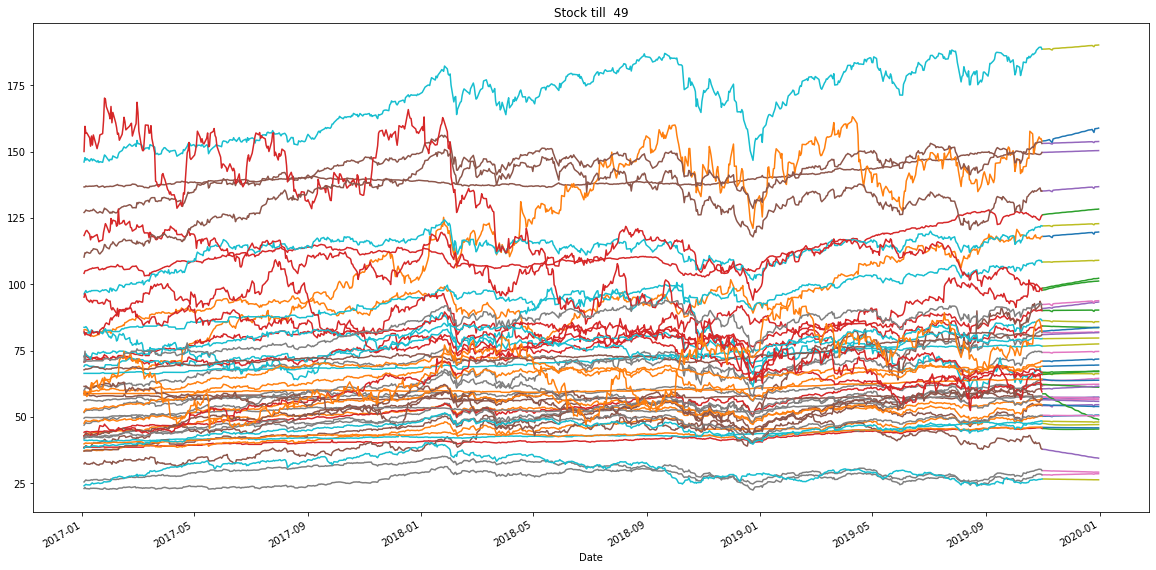

In [ ]:
#STOCK_NO = 0

for i in range (0,50):
    train_fltr = df['stock'] == i                                               # loop index for train data
    train_tmp = df[train_fltr].set_index('Date')[['Close']]                     # plot for train 
    train_tmp['type'] = 'train'
    test_fltr = preds_test_df['stock'] == i                                     # loop index test data
    test_tmp = preds_test_df[test_fltr].set_index('Date')[['Close']]            # plot for test 
    test_tmp['type'] = 'test'
    _ = train_tmp.append(test_tmp).groupby('type')['Close'].plot(figsize=(20, 10), title = f'Stock till  {i}', sharex=False)
    #_ = plt.legend()